<a href="https://colab.research.google.com/github/debernall/Proyecto/blob/main/Proyecto_bootcamp_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto

In [13]:
import numpy as np
print(np.pi)

3.141592653589793


Esto fue añadido desde Google Colab

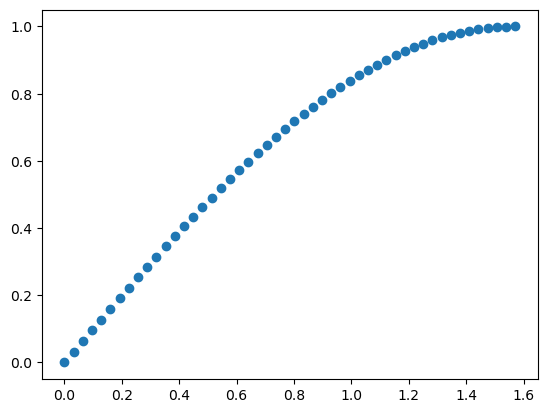

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(0,np.pi/2)
y = np.sin(x)
plt.scatter(x,y)

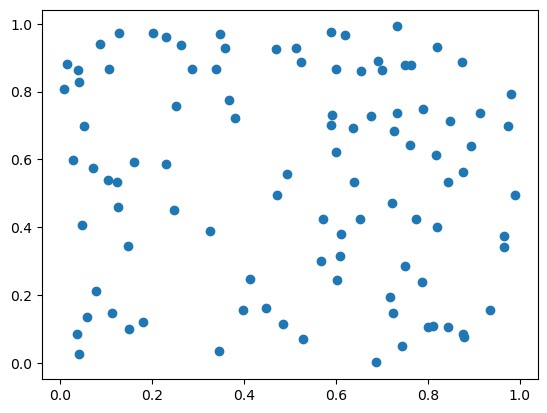

In [6]:
aleatorio = np.random.rand(100,100)
plt.scatter(aleatorio[0],aleatorio[1])